### 앙상블이란 여러개의 weak learners1 를 이용해 최적의 답을 찾아내는 기법이다.

배깅(Bootstrap AGGregatING, Bagging) 이란 테스트 데이터 샘플링(Bootstrap) 통해 여러개의 테스트 데이터를 만들고, 각 테스트 데이터를 이용해 여러개의 weak learner 를 만든다. 최종적으로 각 learner 의 예측결과를 평균내서 종합(aggregate)한다.

부스팅이란(Boosting) 이란 부스트래핑된 테스트 데이터로 여러개의 weak learner 들을 순차적으로(iterative) 만드는데, i번째 learner 는 i-1 번째 learner 가 잘못 예측한 데이터에 가중치를 좀 더 주어서(boosting) 학습한다. 최종적으로 마지막에 생성된 learner 를 이용하여 예측한다.

In [3]:
from md import *

In [4]:
a=np.array([1,2,3,4,5,6,7])

In [6]:
a[a%2==0]

array([2, 4, 6])

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=500,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)


bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)


dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_y_pred=dt_clf.predict(X_test)

In [88]:
X

array([[-4.03039439e-01,  1.07769490e+00],
       [ 9.56401908e-02,  2.00580798e-01],
       [ 5.83048166e-01,  5.74628700e-01],
       [-1.28586848e+00, -1.99985906e-01],
       [-8.16065538e-01,  6.52314513e-01],
       [ 1.29285289e+00, -2.18132256e-01],
       [ 8.01088286e-01,  5.45782121e-02],
       [ 6.72737108e-01,  5.90723657e-01],
       [-6.36788612e-01,  2.57436194e-01],
       [ 1.71520117e+00,  2.26019828e-01],
       [-6.28604910e-01,  9.98864125e-01],
       [-2.93358158e-01,  9.21588505e-01],
       [-5.66151412e-01, -2.50036726e-02],
       [ 5.75535557e-01, -3.23172961e-01],
       [ 1.54505618e+00,  1.39638801e-01],
       [-6.91604418e-01,  5.99253473e-01],
       [ 1.24317022e+00, -2.33636703e-01],
       [ 9.20383963e-02,  9.33530056e-01],
       [ 9.86124826e-01,  8.19721905e-01],
       [ 2.10636145e+00,  1.26332167e-01],
       [-5.32053881e-01,  1.32138670e+00],
       [ 2.46056634e-01,  9.68571758e-01],
       [ 2.32875282e+00,  1.93473134e-01],
       [ 6.

In [82]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [80]:
len(y_pred[y_pred==y_test])

116

In [72]:
pd.concat([pd.DataFrame(X,columns=['x1','x2']),pd.DataFrame(y,columns=['target'])],axis=1)

,x1,x2,target
0,-0.403039,1.077695,0
1,0.095640,0.200581,1
2,0.583048,0.574629,0
3,-1.285868,-0.199986,0
4,-0.816066,0.652315,0
5,1.292853,-0.218132,1
6,0.801088,0.054578,1
7,0.672737,0.590724,0
8,-0.636789,0.257436,0
9,1.715201,0.226020,1


In [77]:
bag_clf.score(X_test,y_test)

0.928

In [76]:
dt_clf.score(X_test,y_test)

0.888

In [73]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [74]:
dt_y_pre

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

* OOB평가

n번의 샘플링중 데이터가 한번도 사용되지않을 확률

사용되지 않은 데이터는 테스트 데이터로 사용가능하다

In [11]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,bootstrap=True,n_jobs=-1,oob_score=True)

In [12]:
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_


0.9333333333333333

In [13]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


In [15]:
Xm,ym=make_moons( noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,ym,stratify=ym,random_state=42)

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging=BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,n_jobs=-1,random_state=42) 
bagging.fit(Xm_train,ym_train)  #n_estimator  : decision tree 몇개할건지


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

* 시각화

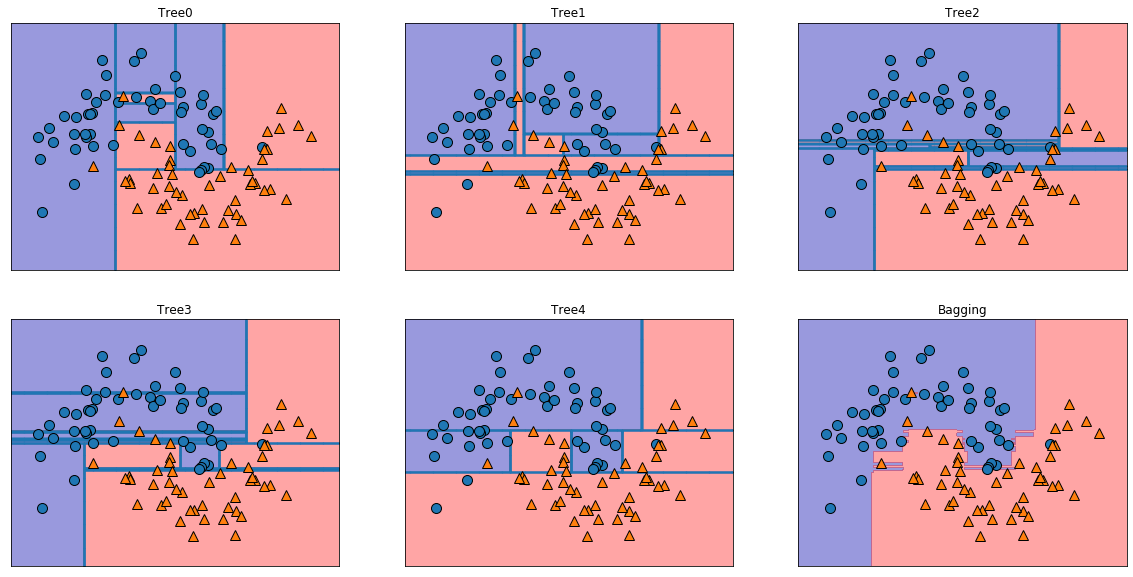

In [17]:
from md import *

import mglearn

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title('Tree{}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
    
mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()
    


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5,n_jobs=-1,random_state=42) 
rf.fit(Xm_train,ym_train)  #n_estimator  : decision tree 몇개할건지

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

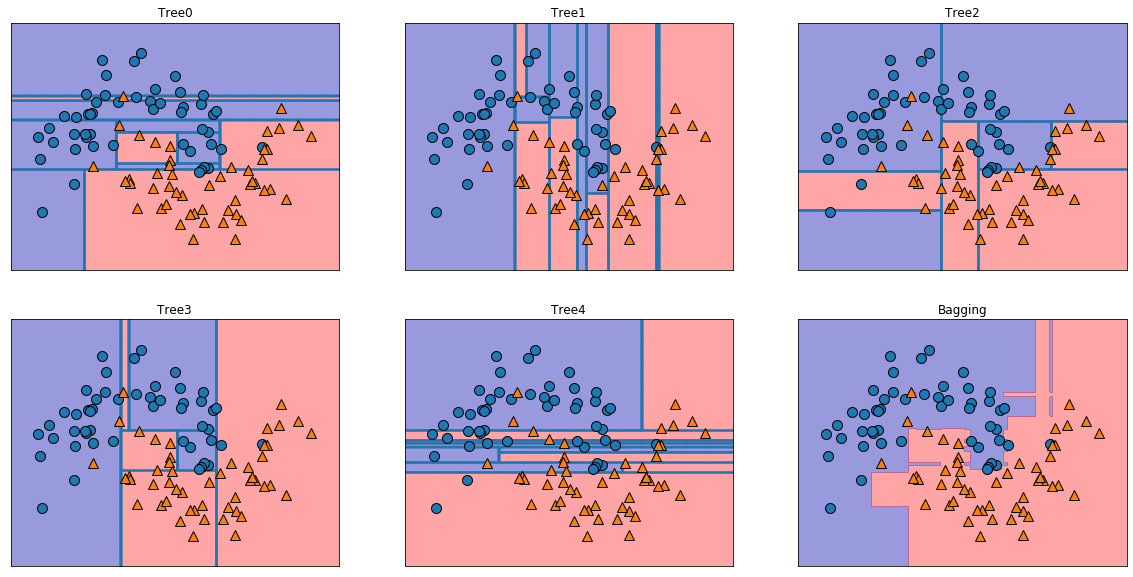

In [62]:

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),rf.estimators_)):
    ax.set_title('Tree{}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
    
mglearn.plots.plot_2d_separator(rf,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

* 랜덤포레스트에서 feature 중요도 알려줌


In [63]:
features=iris['feature_names']
importances=rnd_clf.feature_importances_
indices=np.argsort(importances)


In [65]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
rnd_clf.fit(iris['data'],iris['target'])
for name, importance in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name,'=',importance)

sepal length (cm) = 0.11249225099876375
sepal width (cm) = 0.02311928828251033
petal length (cm) = 0.4410304643639577
petal width (cm) = 0.4233579963547682


* 의사결정 스텀프

adaboosting

In [96]:
from numpy import *

def loadSimpData():
    dataMat=matrix([[1.,2.1],[2.,1.1],[1.3,1.],[1.,1.],[2.,1.]])  #학습할데이터
    classLabels=[1.0,1.0,-1.0,-1.0,1.0]  # 정답데이터
    return dataMat,classLabels

In [107]:
def stumpClassify(dataMatrix,dimen,threshVal,threshlneq):
    retArray=ones((shape(dataMatrix)[0],1))
    if threshlneq=='lt':
        retArray[dataMatrix[:,dimen]<=threshVal]=-1.0
    else:
        retArray[dataMatrix[:,dimen]>threshVal]=-1.0
    return retArray

In [117]:
def buildstump(dataArr,classLabels,D):
    dataMatrix=mat(dataArr);labelMat=mat(classLabels).T
    m,n=shape(dataMatrix)
    numSteps=10.0; bestStump={};bestClasEst=mat(zeros((m,1)))
    minEroor=inf
    
    for i in range(n):
        rangeMin=dataMatrix[:,i].min();rangeMax=dataMatrix[:,i].max();
        stepSize=(rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt','gt']:
                threshVal = (rangeMin+float(j)*stepSize)
                predicteVals=stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr=mat(ones((m,1)))
                errArr[predicteVals==labelMat]=0
                weightedError=D.T*errArr
                print('split:dim{},thresh{},\thresh ineqial:{},the weighted error is{}'.format(i,threshVal,inequal,weightedError))
            if weightedError<minEroor:
                minEroor=weightedError
                bestClasEst=predicteVals.copy()
                bestStump['dim']=i
                bestStump['thresh']=threshVal
                bestStump['ineq']=inequal
            return bestStump,minEroor,bestClasEst

In [122]:
D=mat(ones((5,1))/5)  #가중치 초기화
buildstump(dataMat,classLabels,D)

split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.4]]
split:dim0,thresh0.9,	hresh ineqial:gt,the weighted error is[[0.6]]


({'dim': 0, 'thresh': 0.9, 'ineq': 'gt'}, matrix([[0.6]]), array([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]))

* adaboosting 학습

In [132]:
def adaBoostTrainDS(dataArr,classLabels,numlt=40):
    weakClassArr=[]
    m=shape(dataArr)[0]
    D=mat(ones((m,1))/m)
    aggClassEst=mat(zeros((m,1)))
    for i in range(numlt):
        bestStump, error, classEst=buildstump(dataArr,classLabels,D)
        print('D:{}'.format(D.T))
        alpha=float(0.5*log(1.0-error)/max(error,1e-16))
        bestStump['alpha']=alpha
        weakClassArr.append(bestStump)
        print('classEst:{}'.format(classEst.T))
        expon=multiply(-1*alpha*mat(classLabels).T,classEst)
        D=multiply(D,exp(expon))
        D=D/D.sum()
        aggClassEst+=alpha*classEst
        print('aggClasEst{}'.format(aggClassEst.T))
        aggErrors=multiply(sign(aggClassEst)!=mat(classLabels).T,ones((m,1)))
        errorRate=aggErrors.sum()/m
        print('total error:{}'.format(errorRate))
        if errorRate==0.0:break
    return weakClassArr

In [133]:
adaBoostTrainDS(dataMat,classLabels,9)

split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.4]]
split:dim0,thresh0.9,	hresh ineqial:gt,the weighted error is[[0.6]]
D:[[0.2 0.2 0.2 0.2 0.2]]
classEst:[[-1. -1. -1. -1. -1.]]
aggClasEst[[0.76357561 0.76357561 0.76357561 0.76357561 0.76357561]]
total error:0.4
split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.75430134]]
split:dim0,thresh0.9,	hresh ineqial:gt,the weighted error is[[0.24569866]]
D:[[0.08189955 0.08189955 0.37715067 0.37715067 0.08189955]]
classEst:[[-1. -1. -1. -1. -1.]]
aggClasEst[[1.3373747 1.3373747 1.3373747 1.3373747 1.3373747]]
total error:0.4
split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.90630103]]
split:dim0,thresh0.9,	hresh ineqial:gt,the weighted error is[[0.09369897]]
D:[[0.03123299 0.03123299 0.45315051 0.45315051 0.03123299]]
classEst:[[-1. -1. -1. -1. -1.]]
aggClasEst[[1.86237389 1.86237389 1.86237389 1.86237389 1.86237389]]
total error:0.4
split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.965

[{'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.7635756098951293},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.5737990916170919},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.5249991837299139},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.5089375496805577},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.5032542575141631},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.501192681816162},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.5004381583371168},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.500161107755415},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'gt', 'alpha': -0.5000592571836744}]

In [134]:
adaBoostTrainDS([0.0,0.5],classifierArr)

NameError: name 'classifierArr' is not defined

* adaboost 검사구현

In [141]:
def adaClassify(dataToClass,classifierArr):
    dataMatrix=mat(dataToClass)
    m=shape(dataMatrix)[0]
    aggClassEst=mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst=stumpClassify(dataMatrix,classifierArr[i]['dim'],classifierArr[i]['thresh'],classifierArr[i]['ineq'])
        aggClassEst+=classifierArr[i]['alpha']*classEst
        
        print(aggClassEst)
    return sign(aggClassEst)
classifierArr=adaBoostTrainDS(dataMat,classLabels,30)

split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.4]]
split:dim0,thresh0.9,	hresh ineqial:gt,the weighted error is[[0.6]]
D:[[0.2 0.2 0.2 0.2 0.2]]
classEst:[[-1. -1. -1. -1. -1.]]
aggClasEst[[0.76357561 0.76357561 0.76357561 0.76357561 0.76357561]]
total error:0.4
split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.75430134]]
split:dim0,thresh0.9,	hresh ineqial:gt,the weighted error is[[0.24569866]]
D:[[0.08189955 0.08189955 0.37715067 0.37715067 0.08189955]]
classEst:[[-1. -1. -1. -1. -1.]]
aggClasEst[[1.3373747 1.3373747 1.3373747 1.3373747 1.3373747]]
total error:0.4
split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.90630103]]
split:dim0,thresh0.9,	hresh ineqial:gt,the weighted error is[[0.09369897]]
D:[[0.03123299 0.03123299 0.45315051 0.45315051 0.03123299]]
classEst:[[-1. -1. -1. -1. -1.]]
aggClasEst[[1.86237389 1.86237389 1.86237389 1.86237389 1.86237389]]
total error:0.4
split:dim0,thresh0.9,	hresh ineqial:lt,the weighted error is[[0.965

In [142]:
adaClassify([0,0],classifierArr)

[[-0.76357561]]
[[-1.3373747]]
[[-1.86237389]]
[[-2.37131143]]
[[-2.87456569]]
[[-3.37575837]]
[[-3.87619653]]
[[-4.37635764]]
[[-4.8764169]]
[[-5.3764387]]
[[-5.87644671]]
[[-6.37644966]]
[[-6.87645075]]
[[-7.37645115]]
[[-7.8764513]]
[[-8.37645135]]
[[-8.87645137]]
[[-9.37645138]]
[[-9.87645138]]
[[-10.37645138]]
[[-10.8764514]]
[[-11.37645144]]
[[-11.87645144]]
[[-12.37645156]]
[[-12.87645255]]
[[-13.37645013]]
[[-13.87644968]]
[[-14.37646984]]
[[-14.87648676]]
[[-15.37662267]]


matrix([[-1.]])


* ada 시각화

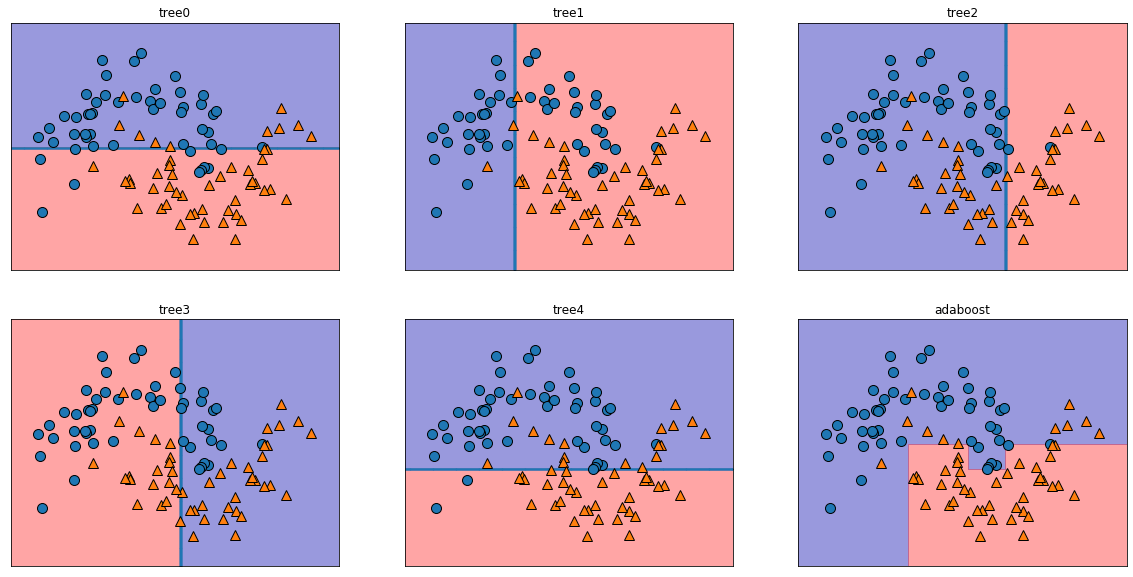

In [144]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=5,random_state=42)
ada.fit(Xm_train,ym_train)

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title('tree{}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(ada,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('adaboost')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()